# Import libararies which are used in project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
#from fancyimpute import KNN 
import os
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns
import time
%matplotlib inline

In [ ]:
url="https://raw.githubusercontent.com/EdgarGaleasfarmingdale/final-project/ee929d3ad339aab120952e82a358d7fc272528ba/Absenteeism%20(1)%20github.csv"

# Importing data

/home/arvind/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.head()


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
ID,,,,,,,,,,,,,,,,,,,,,
11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,"239,554",97.0,...,1.0,90.0,172.0,30.0,4.0,NaN,NaN,NaN,NaN,NaN
36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,"239,554",97.0,...,0.0,98.0,178.0,31.0,0.0,NaN,NaN,NaN,NaN,NaN
3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,"239,554",97.0,...,0.0,89.0,170.0,31.0,2.0,NaN,NaN,NaN,NaN,NaN
7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,"239,554",97.0,...,0.0,68.0,168.0,24.0,4.0,NaN,NaN,NaN,NaN,NaN
11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,"239,554",97.0,...,1.0,90.0,172.0,30.0,2.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
data=data[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Height', 'Body mass index',
       'Absenteeism time in hours']]

# Data Cleaning

In [ ]:
data.isnull().sum()

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
data.dtypes

Reason for absence                 float64
Month of absence                   float64
Day of the week                    float64
Seasons                            float64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [ ]:
# number of unique value in each variable
data.nunique()

Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             20
Distance from Residence to Work    23
Service time                       14
Age                                15
Work load Average/day              38
Hit target                         12
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Height                              8
Body mass index                    15
Absenteeism time in hours           9
dtype: int64

In [ ]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(data.isnull().sum())
missing_val

,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
Work load Average/day,0
Hit target,0


In [ ]:
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,Reason for absence,0
1,Month of absence,0
2,Day of the week,0
3,Seasons,0
4,Transportation expense,0
5,Distance from Residence to Work,0
6,Service time,0
7,Age,0
8,Work load Average/day,0
9,Hit target,0


In [ ]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

missing_val

,Variables,Missing_percentage
0,Reason for absence,0
1,Month of absence,0
2,Day of the week,0
3,Seasons,0
4,Transportation expense,0
5,Distance from Residence to Work,0
6,Service time,0
7,Age,0
8,Work load Average/day,0
9,Hit target,0


In [ ]:
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(data))*100

missing_val['Missing_percentage']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
Name: Missing_percentage, dtype: float64

In [ ]:
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

missing_val

,Variables,Missing_percentage
0,Reason for absence,0.0
1,Disciplinary failure,0.0
2,Body mass index,0.0
3,Height,0.0
4,Pet,0.0
5,Social smoker,0.0
6,Social drinker,0.0
7,Son,0.0
8,Education,0.0
9,Hit target,0.0


In [ ]:
#save output results 
missing_val.to_csv("Miisng_perc.csv", index = False)

In [ ]:
data = data.drop(data[data['Absenteeism time in hours'].isnull()].index, axis=0)
data.shape

(999, 19)

In [ ]:
data.fillna(data.median(),inplace=True)

In [ ]:
data.isnull().sum()

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
#Assigning levels to the categories
lis = []
for i in range(0, data.shape[1]):
    if(data.iloc[:,i].dtypes == 'object'):
        data.iloc[:,i] = pd.Categorical(data.iloc[:,i])
        data.iloc[:,i] = data.iloc[:,i].cat.codes 
        data.iloc[:,i] = data.iloc[:,i].astype('object')
        lis.append(data.columns[i])
        

In [ ]:
data.head(20)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,
11.0,26.0,7.0,3.0,1.0,1.577459,0.638973,0.031994,-0.656831,-1.195253,0.772273,0.0,1.0,2.0,1.0,0.0,1.0,1.470624,1.256757,4.0
36.0,0.0,7.0,3.0,1.0,-2.071847,-1.246921,1.662711,0.376108,-1.195253,0.772273,1.0,1.0,1.0,1.0,0.0,0.0,-0.136765,1.563726,0.0
3.0,23.0,7.0,4.0,1.0,-0.770048,1.868905,1.662711,0.634342,-1.195253,0.772273,0.0,1.0,0.0,1.0,0.0,0.0,-0.136765,1.563726,2.0
7.0,7.0,7.0,5.0,1.0,1.364049,-0.180981,0.358137,0.892577,-1.195253,0.772273,0.0,1.0,2.0,1.0,1.0,0.0,-1.744154,-0.585053,4.0
11.0,23.0,7.0,5.0,1.0,1.577459,0.638973,0.031994,-0.656831,-1.195253,0.772273,0.0,1.0,2.0,1.0,0.0,1.0,1.470624,1.256757,2.0
3.0,23.0,7.0,6.0,1.0,-0.770048,1.868905,1.662711,0.634342,-1.195253,0.772273,0.0,1.0,0.0,1.0,0.0,0.0,-0.136765,1.563726,3.0
10.0,22.0,7.0,6.0,1.0,0.211637,-0.180981,0.031994,-1.948004,-1.195253,0.772273,0.0,1.0,1.0,1.0,0.0,4.0,1.470624,0.335852,8.0
20.0,23.0,7.0,6.0,1.0,0.958571,1.786909,-0.620293,0.117873,-1.195253,0.772273,0.0,1.0,4.0,1.0,0.0,0.0,-1.744154,-0.892021,4.0
14.0,19.0,7.0,2.0,1.0,-1.282231,-1.328917,0.358137,-0.398596,-1.195253,0.772273,0.0,1.0,2.0,1.0,0.0,0.0,-0.136765,-0.278084,3.0


In [ ]:
data.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,
11.0,26.0,7.0,3.0,1.0,1.577459,0.638973,0.031994,-0.656831,-1.195253,0.772273,0.0,1.0,2.0,1.0,0.0,1.0,1.470624,1.256757,4.0
36.0,0.0,7.0,3.0,1.0,-2.071847,-1.246921,1.662711,0.376108,-1.195253,0.772273,1.0,1.0,1.0,1.0,0.0,0.0,-0.136765,1.563726,0.0
3.0,23.0,7.0,4.0,1.0,-0.770048,1.868905,1.662711,0.634342,-1.195253,0.772273,0.0,1.0,0.0,1.0,0.0,0.0,-0.136765,1.563726,2.0
7.0,7.0,7.0,5.0,1.0,1.364049,-0.180981,0.358137,0.892577,-1.195253,0.772273,0.0,1.0,2.0,1.0,1.0,0.0,-1.744154,-0.585053,4.0
11.0,23.0,7.0,5.0,1.0,1.577459,0.638973,0.031994,-0.656831,-1.195253,0.772273,0.0,1.0,2.0,1.0,0.0,1.0,1.470624,1.256757,2.0


In [ ]:
data.shape

(999, 19)

In [ ]:
data.dtypes

Reason for absence                 float64
Month of absence                   float64
Day of the week                    float64
Seasons                            float64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [ ]:
data.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02,999.000000
mean,20.188188,6.236236,3.936937,2.662663,-3.539044e-16,-3.804653e-16,3.716302e-16,-9.557475e-17,9.634852e-16,-2.154947e-17,0.039039,1.216216,1.013013,0.680681,0.054054,0.551552,2.848294e-15,6.701346e-17,3.881882
std,7.437422,2.957997,1.223938,0.977358,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.193785,0.593297,0.938399,0.466446,0.226238,1.180628,1.000000e+00,1.000000e+00,2.891502
min,0.000000,0.000000,2.000000,1.000000,-2.071847e+00,-1.492908e+00,-2.903297e+00,-2.206239e+00,-1.819161e+00,-3.018886e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.547849e+00,-2.119895e+00,0.000000
25%,18.000000,4.000000,3.000000,2.000000,-7.700480e-01,-2.629763e-01,-6.202928e-01,-6.568310e-01,-6.753286e-01,-7.441905e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.367648e-01,-4.315686e-01,2.000000
50%,23.000000,6.000000,4.000000,3.000000,2.116366e-01,-1.809809e-01,3.199405e-02,3.761075e-01,-5.141990e-02,1.404133e-02,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.367648e-01,-2.780844e-01,3.000000
75%,23.000000,8.000000,5.000000,3.000000,4.250463e-01,2.289962e-01,3.581375e-01,3.761075e-01,6.764736e-01,7.722731e-01,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.367648e-01,6.428206e-01,4.000000
max,28.000000,12.000000,6.000000,4.000000,2.452438e+00,1.868905e+00,1.662711e+00,1.925515e+00,2.028276e+00,1.909621e+00,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,3.881708e+00,2.791599e+00,16.000000


In [ ]:
#replace -1 with NA to impute
for i in range(0, data.shape[1]):
    data.iloc[:,i] = data.iloc[:,i].replace(-1, np.nan) 

In [ ]:
data.isnull().sum()

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
data.shape

(999, 19)

In [ ]:
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Height', 'Body mass index', 'Absenteeism time in hours']
continuous_vars

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Transportation expense',
 'Hit target',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [ ]:


categorical_vars = ['Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']
categorical_vars

['Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Disciplinary failure',
 'Education',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Son']

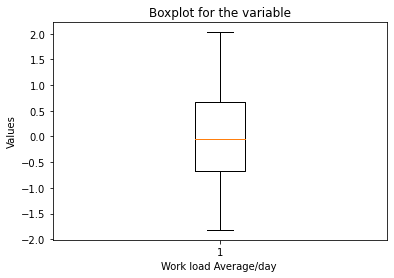

In [ ]:
plt.boxplot(data['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("Boxplot for the variable")
plt.ylabel('Values')
plt.show()

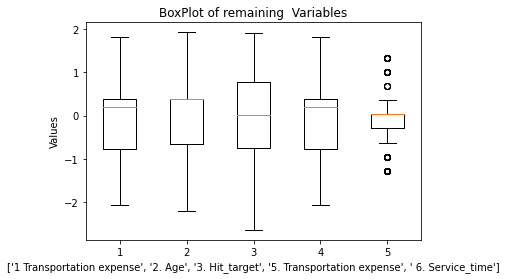

In [ ]:
plt.boxplot([ data['Transportation expense'],  data['Age'], data['Hit target'], data['Transportation expense'],data['Service time']])
plt.xlabel(['1 Transportation expense', '2. Age', '3. Hit_target', '5. Transportation expense',' 6. Service_time'])
plt.title("BoxPlot of remaining  Variables")
plt.ylabel('Values')
plt.show()

In [ ]:
for i in continuous_vars:
    print(i)
    q75, q25=np.percentile(data.loc[:,i],[75,25])
    iqr=q75-q25
    
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    
    print(min)
    print(max)
    
    # Replace all the outliers value to NA
    data.loc[data[i]< min,i] = np.nan
    data.loc[data[i]> max,i] = np.nan
    data.fillna(data.median(),inplace=True)
    

Distance from Residence to Work
-0.18098090068769787
-0.18098090068769787
Service time
-0.7833644874317965
0.5212091703208435
Age
-2.2062388550674035
1.925515317093977
Work load Average/day 
-2.7030318380233433
2.7041768156007264
Transportation expense
-2.498666491512676
2.1109828955277568
Hit target
-3.018885855183626
3.0469685143016143
Height
-0.1367648436168947
-0.1367648436168947
Body mass index
-1.6594420379315782
2.0241782103276114
Absenteeism time in hours
0.5
4.5


In [ ]:
data.shape

(999, 19)

In [ ]:
data.isnull().sum()

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Feature Selection

In [ ]:
##Correlation analysis
#Correlation plot
df_corr = data.loc[:,continuous_vars]
df_corr

NameError: ignored

In [ ]:
data.describe()

NameError: ignored

# Feature Selection

In [ ]:
##Correlation analysis
#Correlation plot
data_corr=data.loc[:,continuous_vars]


/tmp/ipykernel_9903/795118444.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 100, as_cmap=True),


<AxesSubplot:>

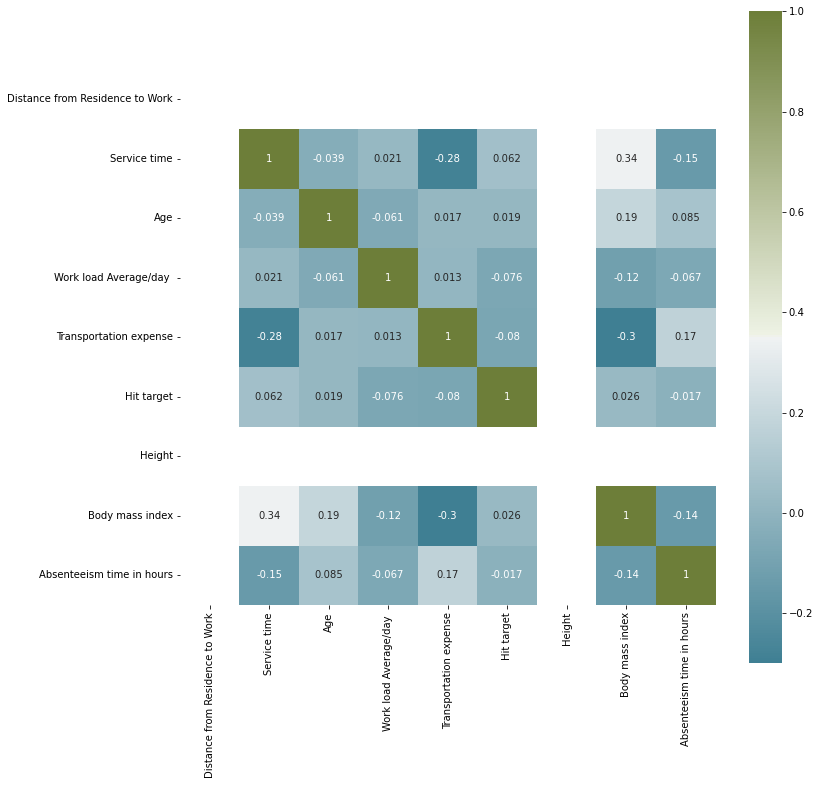

In [ ]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(12, 12))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 100, as_cmap=True),
            square=True,annot=True, ax=ax)

In [ ]:
#loop for ANOVA test BECAUSE the target variable is continuous
for i in categorical_vars:
    f, p = stats.f_oneway(data[i], data["Absenteeism time in hours"])
    print("P Value  for  : "+str(i)+" ...................: "+str(p))

P Value  for  : Reason for absence ...................: 0.0
P Value  for  : Month of absence ...................: 1.5701760037834813e-223
P Value  for  : Day of the week ...................: 1.3818444702777748e-137
P Value  for  : Seasons ...................: 0.08302097936350554
P Value  for  : Disciplinary failure ...................: 0.0
P Value  for  : Education ...................: 0.0
P Value  for  : Social drinker ...................: 0.0
P Value  for  : Social smoker ...................: 0.0
P Value  for  : Pet ...................: 0.0
P Value  for  : Son ...................: 5.660312e-318


In [ ]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
continuous_vars = [i for i in continuous_vars if i not in to_drop]
categorical_vars = [i for i in categorical_vars if i not in to_drop]

NameError: ignored

 # Feature Scalling

/home/arvind/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


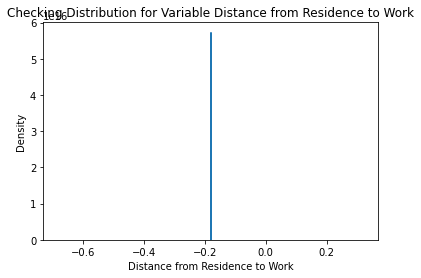

/home/arvind/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


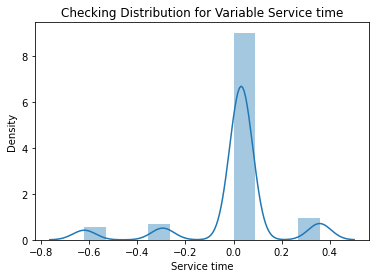

/home/arvind/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


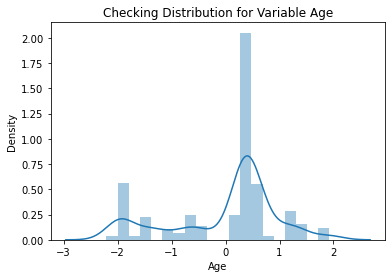

/home/arvind/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


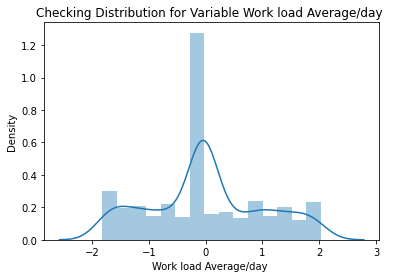

/home/arvind/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


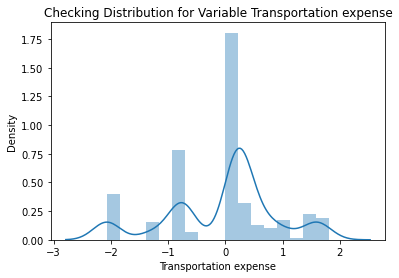

/home/arvind/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


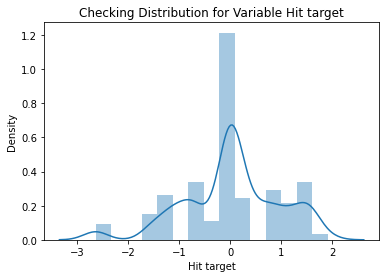

/home/arvind/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


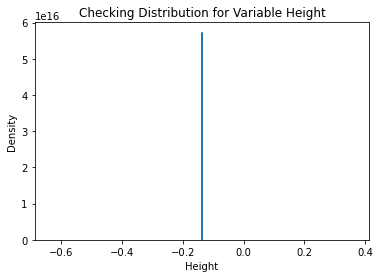

/home/arvind/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


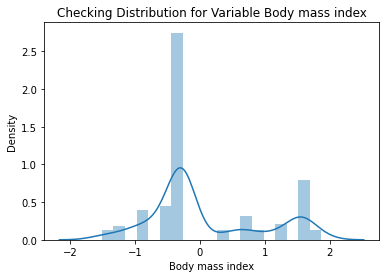

In [ ]:
# Checking if there is any normally distributed variable in data
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

# Standardization & Normalization

In [ ]:
# #Normalization
#for i in continuous_vars:
 #   if i == 'Absenteeism time in hours':
 #       continue
 #   data[i]=(data[i]-min*(data[i]))/(max*(data[i])-min*(data[i]))

In [ ]:
##Standardization
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    data[i] = (data[i] - data[i].mean())/data[i].std()

In [ ]:
data.head(20)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,
11.0,26.0,7.0,3.0,1.0,1.697786,0.999499,0.130297,-0.656831,-1.195253,0.780389,0.0,1.0,2.0,1.0,0.0,1.0,-0.999499,1.377939,4.0
36.0,0.0,7.0,3.0,1.0,-2.142515,0.999499,0.130297,0.376108,-1.195253,0.780389,1.0,1.0,1.0,1.0,0.0,0.0,-0.999499,1.731902,3.0
3.0,23.0,7.0,4.0,1.0,-0.772583,0.999499,0.130297,0.634342,-1.195253,0.780389,0.0,1.0,0.0,1.0,0.0,0.0,-0.999499,1.731902,2.0
7.0,7.0,7.0,5.0,1.0,1.473207,0.999499,1.843018,0.892577,-1.195253,0.780389,0.0,1.0,2.0,1.0,1.0,0.0,-0.999499,-0.745838,4.0
11.0,23.0,7.0,5.0,1.0,1.697786,0.999499,0.130297,-0.656831,-1.195253,0.780389,0.0,1.0,2.0,1.0,0.0,1.0,-0.999499,1.377939,2.0
3.0,23.0,7.0,6.0,1.0,-0.772583,0.999499,0.130297,0.634342,-1.195253,0.780389,0.0,1.0,0.0,1.0,0.0,0.0,-0.999499,1.731902,3.0
10.0,22.0,7.0,6.0,1.0,0.260480,0.999499,0.130297,-1.948004,-1.195253,0.780389,0.0,1.0,1.0,1.0,0.0,4.0,-0.999499,0.316051,3.0
20.0,23.0,7.0,6.0,1.0,1.046507,0.999499,-3.295144,0.117873,-1.195253,0.780389,0.0,1.0,4.0,1.0,0.0,0.0,-0.999499,-1.099800,4.0
14.0,19.0,7.0,2.0,1.0,-1.311573,0.999499,1.843018,-0.398596,-1.195253,0.780389,0.0,1.0,2.0,1.0,0.0,0.0,-0.999499,-0.391875,3.0


In [ ]:
# Get dummy variables for categorical variables
data = pd.get_dummies(data = data, columns = categorical_vars)


In [ ]:
data.iloc[:, data.columns != 'Absenteeism time in hours'].head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Reason for absence_0.0,Reason for absence_1.0,...,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0
ID,,,,,,,,,,,,,,,,,,,,,
11.0,1.697786,0.999499,0.130297,-0.656831,-1.195253,0.780389,-0.999499,1.377939,0,0,...,1,0,0,0,0,0,0,1,0,0
36.0,-2.142515,0.999499,0.130297,0.376108,-1.195253,0.780389,-0.999499,1.731902,1,0,...,0,0,0,0,0,0,1,0,0,0
3.0,-0.772583,0.999499,0.130297,0.634342,-1.195253,0.780389,-0.999499,1.731902,0,0,...,0,0,0,0,0,1,0,0,0,0
7.0,1.473207,0.999499,1.843018,0.892577,-1.195253,0.780389,-0.999499,-0.745838,0,0,...,0,0,0,0,0,0,0,1,0,0
11.0,1.697786,0.999499,0.130297,-0.656831,-1.195253,0.780389,-0.999499,1.377939,0,0,...,1,0,0,0,0,0,0,1,0,0


# Model Development Phase

In [ ]:
#Import Libraries for decision tree
from sklearn import tree
import sklearn
from sklearn.metrics import accuracy_score
#import sklearn.cross_validation 

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split( data.iloc[:, data.columns != 'Absenteeism time in hours'], data.iloc[:, 8], test_size = 0.25)

# Decision Tree Regressor

In [ ]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
t5=time.time()
pred_test = fit_DT.predict(X_test)
t6=time.time()-t5
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("RMSE For Train = "+str(rmse_for_train))
print("RMSE For Test = "+str(rmse_for_test))
print("time in second :::::::::::::::::::::::::::::::::::"+str(t6))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

NameError: ignored

In [ ]:
#Random Forest
#from sklearn.ensemble import RandomForestClassifier

#RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [ ]:
#RF_Predictions = RF_model.predict(X_test)

In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, RF_Predictions)

In [ ]:
#KNN implementation
#from sklearn.neighbors import KNeighborsClassifier

#KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)

In [ ]:
#predict test cases
#KNN_Predictions = KNN_model.predict(X_test)

In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, RF_Predictions)

# Gradient Boosting Regressor

In [ ]:
# Importing library for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
t3=time.time()
pred_test = fit_GB.predict(X_test)
t4=time.time()-t3
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("RMSE IN TRAIN = "+str(rmse_for_train))
print("RMSE IN Test = "+str(rmse_for_test))
print("time in second :::::::::::::::::::::::::::::::::::"+str(t4))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

NameError: ignored

# Linear Regression Model

In [ ]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
t7=time.time()
pred_test = fit_LR.predict(X_test)
t8=time.time()-t7
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("RMSE IN Train = "+str(rmse_for_train))
print("RMSE IN TEST = "+str(rmse_for_test))
print("time in second :::::"+str(t8))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

NameError: ignored

# Random Forest Regressor

In [ ]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor
import time

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
t1=time.time()
pred_test = fit_RF.predict(X_test)
t2=time.time()-t1
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("RMSE  ForTrain = "+str(rmse_for_train))
print("RMSE for Test = "+str(rmse_for_test))
print("time in second :::::"+str(t2))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

NameError: ignored